In [1]:
import os
os.getcwd()

'C:\\Users\\sim\\Miniconda2'

In [9]:
import pandas as pd
train_df = pd.read_csv("train.csv",index_col = 'PassengerId') #read csv files and make PassengerId column as index
test_df = pd.read_csv("test.csv",index_col = "PassengerId") #read csv files and make PassengerId column as index

In [15]:
type(train_df) #get the type
type(test_df) #get the type

pandas.core.frame.DataFrame

In [14]:
#get a brief information about the dataframe using .info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [17]:
#Adding Survived column in test_df
test_df['Survived']=-88

In [19]:
#concatenate train_df and test_df to find the survival rate for test data that
#we will calculate later.
df = pd.concat((train_df,test_df),axis=0) 
#axis = 0 means two data frames are concatenated row wise 
#axis = 1 means two data frames are concatenated column wise

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [22]:
df.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [23]:
df.tail(5)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-88,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-88,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-88,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-88,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-88,2668


In [26]:
#Indexing and Selection
#use loc for label based index
df.loc[1:5,['Name','Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0


In [30]:
#use iloc for position based index
df.iloc[:6,4:6]

,Name,Parch
PassengerId,,
1,"Braund, Mr. Owen Harris",0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0
3,"Heikkinen, Miss. Laina",0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0
5,"Allen, Mr. William Henry",0
6,"Moran, Mr. James",0


In [32]:
#filter rows based on conditions
female_passengers = df.loc[df.Sex == 'female',:]
print ("Number of Female Passengers: {0}".format(len(female_passengers)))

Number of Female Passengers: 466


In [39]:
#female travelling in the first class
female_first_class = df.loc[(df.Sex == 'female') & (df.Pclass == 1)]
print ("Female passengers travelling first class: {0}".format(len(female_first_class)))

Female passengers travelling first class: 144


In [ ]:
#you can check
female_first_class = df.loc[(df.Sex == 'female') & (df.Pclass == 1)]
print female_first_class

In [52]:
#Summary Statistics
#we can use .describe() to get statistics for all numeric columns
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-27.839572
std,14.413493,51.758668,0.865560,0.837836,1.041658,41.223679
min,0.170000,0.000000,0.000000,1.000000,0.000000,-88.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-88.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [43]:
#numeric features
#centrality measure
print("Mean Fare: {0}".format(df.Fare.mean()))
print("Median Fare: {0}".format(df.Fare.median()))

Mean Fare: 33.2954792813
Median Fare: 14.4542


In [49]:
#calculate range of fare
print("Range: {0}".format(df.Fare.max() - df.Fare.min()))

#calculate variance
print ("Variance: {0}".format(df.Fare.var()))

#calcuate Standard Deviation
print("Standard Variation: {0}".format(df.Fare.std()))

#calculate Percentile
print("25 percentile: {0}".format(df.Fare.quantile(.25)))
print("50 percentile: {0}".format(df.Fare.quantile(.50)))
print("75 percentile: {0}".format(df.Fare.quantile(.75)))



Range: 512.3292
Variance: 2678.95973789
Standard Variation: 51.7586682392
25 percentile: 7.8958
50 percentile: 14.4542
75 percentile: 31.275


In [51]:
#use describe(include = all) 
df.describe(include = 'all')
#NaN means not a number this may occur because of missing values

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-27.839572,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,41.223679,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-88.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-88.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [53]:
#categorical column: counts
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [54]:
df[df.Survived != -88].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

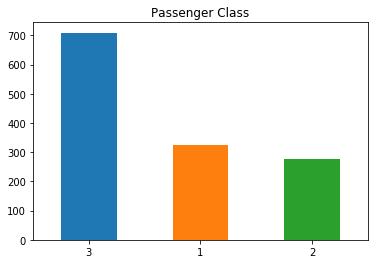

In [59]:
#visualize count
import matplotlib as pl
df.Pclass.value_counts().plot(kind= 'bar',rot = 0,title = 'Passenger Class') #rot is for rotation

In [65]:
#categorical column: Proportions
df.Pclass.value_counts(normalize = True) 
#df.Pclass.value_counts()

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64